<a href="https://colab.research.google.com/github/pujasc/CNNDailyMail/blob/master/Summarization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data 
The tookenized and chunked Data is fetched from Github Repository.

In [18]:
!git clone https://github.com/pujasc/CNNDailymail_CSV.git
#!ls CNNDailyMail

fatal: destination path 'CNNDailymail_CSV' already exists and is not an empty directory.


In [19]:
!ls CNNDailymail_CSV

Data_001.csv  Data_003.csv  Data_005.csv  Data_007.csv	Data_009.csv
Data_002.csv  Data_004.csv  Data_006.csv  Data_008.csv	Data_010.csv


In [20]:

import glob
import struct
import pandas as pd
data_path='/content/CNNDailymail_CSV/Data*'
filelist = glob.glob(data_path) # get the list of datafiles  

li=[]
i=0
for f in filelist:
  if i==5:
    break;
  print(f)
  df = pd.read_csv(f,header=0)
  li.append(df)
  i=i+1

frame = pd.concat(li, axis=0, ignore_index=True)
print(frame.shape)

/content/CNNDailymail_CSV/Data_007.csv
/content/CNNDailymail_CSV/Data_008.csv
/content/CNNDailymail_CSV/Data_010.csv
/content/CNNDailymail_CSV/Data_009.csv
/content/CNNDailymail_CSV/Data_002.csv
(50000, 2)


In [21]:
frame.describe()

,Article,Summary
count,50000,50000
unique,39947,39877
top,By . Beth Stebner and Hayley Peterson . PUBLIS...,Washington Post associate editor Bob Woodward ...
freq,10000,10000


In [0]:
frame.drop_duplicates(subset ="Article",keep = 'first', inplace = True)
frame.dropna(axis=0,inplace=True)
frame.drop_duplicates(subset ="Summary",keep = 'first', inplace = True)
frame.dropna(axis=0,inplace=True)

In [23]:
frame.describe()

,Article,Summary
count,39877,39877
unique,39877,39877
top,"By . Matt Chorley, Mailonline Political Editor...","Shropshire Council spent Ã‚Â£361,800 on 650 iP..."
freq,1,1


In [24]:
print(frame.head())
def stripcnnsource(str,seq,size):
  index=str.find(seq)
  if index !=-1 :
    return (str[index+size:] )
  else:
    return str

frame['Article']=frame.apply(lambda row: stripcnnsource(row['Article'],'(CNN)',9),axis=1)
frame['Article']=frame.apply(lambda row: stripcnnsource(row['Article'],'UPDATED:',13),axis=1)
frame['Article']=frame.apply(lambda row: stripcnnsource(row['Article'],'PUBLISHED:',13),axis=1)
print(frame.head())

                                                 Article                                            Summary
0      By . Beth Stebner and Hayley Peterson . PUBLIS...  Washington Post associate editor Bob Woodward ...
10000  They were comrades in arms who died on the bat...  Two former students of Holland Park School die...
10001  Amanda Knox can no longer rely on Raffaele Sol...  Sollecito and Knox reconvicted of Meredith Ker...
10002  By . Jessica Jerreat . A Detroit teenager was ...  Five men have been charged over beating that l...
10003  Los Angeles (CNN) -- Michael Jackson "clearly"...  NEW: Dr. Klein injected 6,500 milligrams of De...
                                                 Article                                            Summary
0      :45 EST, 28 February 2013 . Long-time Washingt...  Washington Post associate editor Bob Woodward ...
10000  They were comrades in arms who died on the bat...  Two former students of Holland Park School die...
10001  Amanda Knox can no lo

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [26]:
import matplotlib.pyplot as plt

contractionCount={}
for w in contraction_mapping:
  c=sum(frame.Article.str.count(w))
  c+=sum(frame.Summary.str.count(w))
  contractionCount.update({w:c})
print( sum(frame.Article.str.count(next(iter(contraction_mapping)))))


85


In [27]:
contractionCount={x:y for x,y in contractionCount.items() if y!=0}
contractionCount

{"'cause": 48,
 "I'd": 1522,
 "I'll": 1161,
 "I'm": 10034,
 "I've": 4083,
 "ain't": 87,
 "aren't": 1290,
 "can't": 5153,
 "could've": 74,
 "couldn't": 3144,
 "didn't": 9389,
 "doesn't": 4891,
 "don't": 12522,
 "hadn't": 776,
 "hasn't": 1431,
 "haven't": 1202,
 "he'd": 1396,
 "he'll": 744,
 "he's": 7511,
 "here's": 5510,
 "how'd": 1,
 "how's": 343,
 "i'd": 1,
 "i'll": 3,
 "i'm": 9,
 "i've": 2,
 "isn't": 2761,
 "it'd": 25,
 "it'll": 122,
 "it's": 14580,
 "let's": 477,
 "ma'am": 7,
 "might've": 8,
 "must've": 17,
 "mustn't": 23,
 "needn't": 17,
 "o'clock": 70,
 "oughtn't": 1,
 "shan't": 1,
 "she'd": 431,
 "she'll": 170,
 "she's": 1925,
 "should've": 25,
 "shouldn't": 810,
 "so's": 108,
 "that'd": 7,
 "that's": 4741,
 "there'd": 18,
 "there's": 3154,
 "they'd": 438,
 "they'll": 466,
 "they're": 2796,
 "they've": 916,
 "this's": 1,
 "wasn't": 4279,
 "we'd": 344,
 "we'll": 698,
 "we're": 2749,
 "we've": 1443,
 "weren't": 931,
 "what'll": 3,
 "what's": 1153,
 "when's": 3,
 "where'd": 2,
 "whe

<BarContainer object of 76 artists>

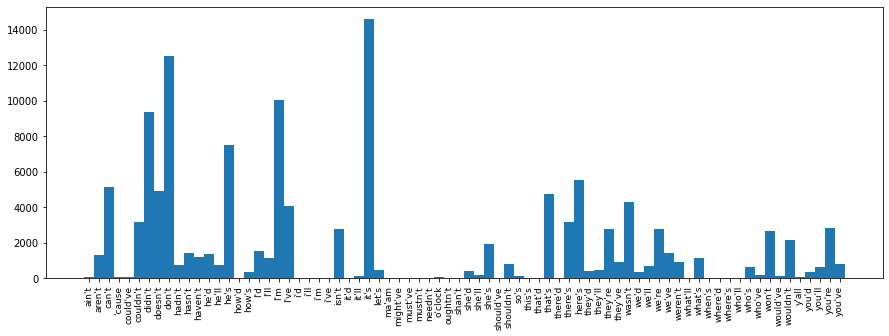

In [28]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=9)
plt.bar(contractionCount.keys(), contractionCount.values(),width=1)

In [0]:
import re

def CleanTEXT(text,seq):
    CleanText = text.lower()
    #CleanText = re.sub(r'\([^)]*\)', '', CleanText)
    #CleanText = re.sub('"','', CleanText)
    CleanText = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in CleanText.split(" ")])    
    #CleanText = re.sub(r"'s\b","",CleanText)
    #CleanText = re.sub("[^a-zA-Z]", " ", CleanText) 
    if(seq==0):
        tokens = [w for w in CleanText.split() ]
    else:
        tokens=CleanText.split()

    long_words=[]
    for i in tokens:
        if len(i)>2:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()




In [30]:
frame['Clean_Article']=frame.apply(lambda row: CleanTEXT(row['Article'],0),axis=1)
frame['Clean_Summary']=frame.apply(lambda row: CleanTEXT(row['Summary'],1),axis=1)
#frame['Clean_Summary']=frame.apply(lambda x : '_START_ '+ x + ' _END_')
frame.head()

,Article,Summary,Clean_Article,Clean_Summary
0,":45 EST, 28 February 2013 . Long-time Washingt...",Washington Post associate editor Bob Woodward ...,":45 est, february 2013 long-time washington po...",washington post associate editor bob woodward ...
10000,They were comrades in arms who died on the bat...,Two former students of Holland Park School die...,they were comrades arms who died the battlefie...,two former students holland park school died f...
10001,Amanda Knox can no longer rely on Raffaele Sol...,Sollecito and Knox reconvicted of Meredith Ker...,amanda knox can longer rely raffaele sollecito...,sollecito and knox reconvicted meredith kerche...
10002,By . Jessica Jerreat . A Detroit teenager was ...,Five men have been charged over beating that l...,jessica jerreat detroit teenager was charged w...,five men have been charged over beating that l...
10003,"Michael Jackson ""clearly"" suffered from insomn...","NEW: Dr. Klein injected 6,500 milligrams of De...","michael jackson ""clearly"" suffered from insomn...","new: dr. klein injected 6,500 milligrams demer..."


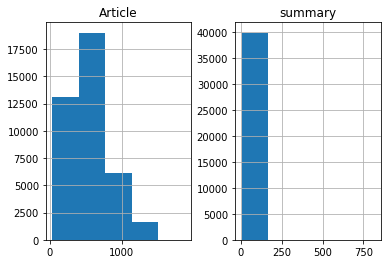

In [31]:
article_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in frame['Clean_Article']:
      article_word_count.append(len(i.split()))

for i in frame['Clean_Summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Article':article_word_count, 'summary':summary_word_count})

length_df.hist(bins = 5)

plt.show()

Max length of Article 500 and max length of summary 50.

In [0]:
frame['Clean_Summary']=frame['Clean_Summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [33]:
print(frame['Clean_Summary'][0])

sostok washington post associate editor bob woodward called obama's sequester plan cut defense spending 'madness' said was threatened senior white house official for damaging op-ed piece published over the weekend that would 'regret doing this' white house says that aide did not mean any harm and that woodward likely misinterpreted sequester, series crippling budget cuts, set into effect friday eostok


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

XTrain,XTest,YTrain,YTest=train_test_split(np.array(frame['Clean_Article']),np.array(frame['Clean_Summary']),test_size=0.2,random_state=0,shuffle=True)

In [35]:
print(YTrain[0])

sostok suarez was banned after biting giorgio chiellini world cup match but who else makes sportsmail's hall shame? eostok


In [36]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(XTrain))


Using TensorFlow backend.


In [37]:
print(len(x_tokenizer.word_counts))

235455


In [38]:
thresh=60
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 92.45333503217175
Total Coverage of rare words: 6.6066026038898675


In [39]:
x_tokenizer=Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(XTrain))
print(x_tokenizer.num_words)

17769


In [40]:


XTrain_seq= x_tokenizer.texts_to_sequences(XTrain)
XTest_seq=x_tokenizer.texts_to_sequences(XTest)

#padding zero to make the length equal
XTrain=pad_sequences(XTrain_seq,maxlen=500,padding='post')
XTest=pad_sequences(XTest_seq,maxlen=500,padding='post')

x_voc=x_tokenizer.num_words+1
print(x_voc)

17770


In [0]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(YTrain))

In [42]:
thresh=10

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 83.78157108354824
Total Coverage of rare words: 9.722736050854861


In [0]:
y_tokenizer=Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(YTrain))

In [0]:
YTrain_seq= y_tokenizer.texts_to_sequences(YTrain)
YTest_seq=y_tokenizer.texts_to_sequences(YTest)

YTrain=pad_sequences(YTrain_seq,maxlen=50,padding='post')
YTest=pad_sequences(YTest_seq,maxlen=50,padding='post')

y_voc=y_tokenizer.num_words+1

In [45]:
print(y_voc)
print( len(y_tokenizer.word_counts) +1)
print(XTrain.shape)

11887
73288
(31901, 500)


In [0]:
ind=[]
for i in range(len(YTrain)):
    cnt=0
    for j in YTrain[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

YTrain=np.delete(YTrain,ind, axis=0)
XTrain=np.delete(XTrain,ind, axis=0)

In [0]:
ind=[]
for i in range(len(YTest)):
    cnt=0
    for j in YTest[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

YTest=np.delete(YTest,ind, axis=0)
XTest=np.delete(XTest,ind, axis=0)

#Attention Layer Implementation

In [0]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K

class Attention(Layer):
  #define the four main function
  def __init__(self,**kwargs):
    super(Attention,self).__init__(**kwargs)

  def build(self,input_shape):
    assert isinstance(input_shape,list)
    #define the weight matrices 
    self.W_a = self.add_weight(name='W_a',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
    self.U_a = self.add_weight(name='U_a',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
    self.V_a = self.add_weight(name='V_a',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)

    super(Attention, self).build(input_shape)

  def call(self,inputs):
    assert type(inputs)==list
    encoder_out_seq, decoder_out_seq = inputs

    def energyfun(inputs,states):
      en_seq_len,en_hidden=encoder_out_seq.shape[1],encoder_out_seq.shape[2]
      de_hidden=inputs.shape[-1]

      reshaped_enc_outputs=K.reshape(encoder_out_seq,(-1,en_hidden))
      #S.wa
      Wa_dotproduct_s=K.reshape(K.dot(reshaped_enc_outputs,self.W_a),(-1,en_seq_len,en_hidden))
      #hj.Ua
      Ua_dotproduct_hj=K.expand_dims(K.dot(inputs,self.U_a),1)
      #tanh(S.Wa+hj.Ua)
      reshaped_tanfunc=K.tanh(K.reshape(Wa_dotproduct_s+Ua_dotproduct_hj,(-1,en_hidden)))
      #Softmax function
      e_i=K.reshape(K.dot(reshaped_tanfunc,self.V_a),(-1,en_seq_len))
      e_i=K.softmax(e_i)

      return e_i,[e_i]

    def context_step(inputs,states):
      c_i=K.sum(encoder_out_seq*K.expand_dims(inputs,-1),axis=1)
      return c_i,[c_i]

    def initial_state(inputs,hidden_size):
      fake_state=K.zeros_like(inputs)
      fake_state=K.sum(fake_state,axis=[1,2])
      fake_state=K.expand_dims(fake_state)
      fake_state=K.tile(fake_state,[1,hidden_size])
      return fake_state
    
    fake_state_c=initial_state(encoder_out_seq,encoder_out_seq.shape[-1])
    fake_state_e=initial_state(encoder_out_seq,encoder_out_seq.shape[1])
    #energy outputs
    last_out,e_outputs,_=K.rnn(energyfun,decoder_out_seq,[fake_state_e],)
    #context vectors
    last_out,c_outputs,_=K.rnn(context_step,e_outputs,[fake_state_c],)
    
    return c_outputs,e_outputs

  def compute_output_shape(self,input_shape):
    return [tf.TensorShape((input_shape[1][0],input_shape[1][1],input_shape[1][2])),tf.TensorShape((input_shape[1][0],input_shape[1][1],input_shape[0][1]))]



#Model: Stacked LSTM

In [49]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary = {}".format(x_voc))

K.clear_session()

latent_dim=50
embedding_dim=30
max_article_len=500
#Encoder
encoder_inputs=Input(shape=(max_article_len,))
#keras encoding embedding layer
enc_emb=Embedding(x_voc,embedding_dim,trainable=True)(encoder_inputs)

#layer1
encoder_lstm1=LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1,state_h1,state_c1=encoder_lstm1(enc_emb)

#layer 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#layer 3
encoder_lstm3 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

#Decoder will use the encoder_states as intial sstate
decoder_inputs=Input(shape=(None,))

#Decoder Embedding layer
dec_emb_layer=Embedding(y_voc,embedding_dim,trainable=True)
dec_emb=dec_emb_layer(decoder_inputs)

decoder_lstm=LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state,decoder_back_state=decoder_lstm(dec_emb,initial_state=[state_h,state_c])

#Attention Layer
attn_layer=Attention(name='attention_layer')
attn_out,attn_state=attn_layer([encoder_outputs,decoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


Size of vocabulary = 17770
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 30)      533100      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 500, 50), (N 16200       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
___________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
checkpoint_path = F"/content/gdrive/My Drive/training_1/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,save_best_only=True,verbose=1)

In [0]:
import pickle
xpath=F"/content/gdrive/My Drive/x_tokenizer3.pickle"
ypath=F"/content/gdrive/My Drive/y_tokenizer3.pickle"
with open(xpath, 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(ypath, 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [55]:
history=model.fit([XTrain,YTrain[:,:-1]],YTrain.reshape(YTrain.shape[0],YTrain.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=([XTest,YTest[:,:-1]], YTest.reshape(YTest.shape[0],YTest.shape[1], 1)[:,1:]))

Epoch 1/10
250/250 [==============================] - 1667s 7s/step - loss: 5.9158 - val_loss: 5.4382
Epoch 2/10
250/250 [==============================] - 1656s 7s/step - loss: 5.4640 - val_loss: 5.3427
Epoch 3/10
250/250 [==============================] - 1661s 7s/step - loss: 5.3501 - val_loss: 5.2668
Epoch 4/10
250/250 [==============================] - 1655s 7s/step - loss: 5.2902 - val_loss: 5.2230
Epoch 5/10
250/250 [==============================] - 1654s 7s/step - loss: 5.2156 - val_loss: 5.1171
Epoch 6/10
250/250 [==============================] - 1652s 7s/step - loss: 5.1282 - val_loss: 5.0470
Epoch 7/10
250/250 [==============================] - 1642s 7s/step - loss: 5.0520 - val_loss: 4.9767
Epoch 8/10
250/250 [==============================] - 1656s 7s/step - loss: 4.9870 - val_loss: 4.9279
Epoch 9/10
250/250 [==============================] - 1654s 7s/step - loss: 4.9283 - val_loss: 4.8800
Epoch 10/10
250/250 [==============================] - 1659s 7s/step - loss: 4.879

In [0]:
#!pip install h5py

In [0]:
model_save_name = 'LSTMmodel3modelarchitecture.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)

In [0]:
import json
history_dict = history.history
historypath = F"/content/gdrive/My Drive/history3" 
json.dump(history_dict, open(historypath, 'w'))

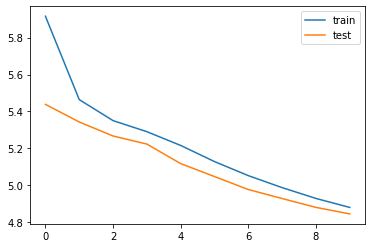

In [71]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [72]:
YTrain.shape[0],YTrain.shape[1], 1

(31901, 50, 1)

In [0]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [0]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

In [0]:
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_article_len,latent_dim))

In [0]:
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [0]:
max_summary_len=50

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [80]:
for i in range(0,10):
    print("Review:",seq2text(XTrain[i]))
    print("Original summary:",seq2summary(YTrain[i]))
    print("Predicted summary:",decode_sequence(XTrain[i].reshape(1,max_article_len)))
    print("\n")

Review: 2000 was found guilty with asian during tour india died light plane crash three years later still banned still denial captain shock south africa's was found guilty match fixing 2000 died three years later lance armstrong after years denials the cyclist finally confessed that those record breaking tour france triumphs were fuelled steroids also betrayed the millions devoted fans who admired him for the phenomenal that had raised him from cancer record but lance armstrong admitted all those tour france titles were fuelled steroids the truth armstrong sat down with emma o'reilly and sportsmail's matt lawton for exclusive interview last year luis suarez serial whose latest sinking the was into giorgio chiellini brazil more than enough said new entry luis suarez definite this list after bit giorgio chiellini the world cup match last month painful suarez was banned for four months and nine international games has only just apologised antonio had plaster paris taped onto his for world